## canada per capita income

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


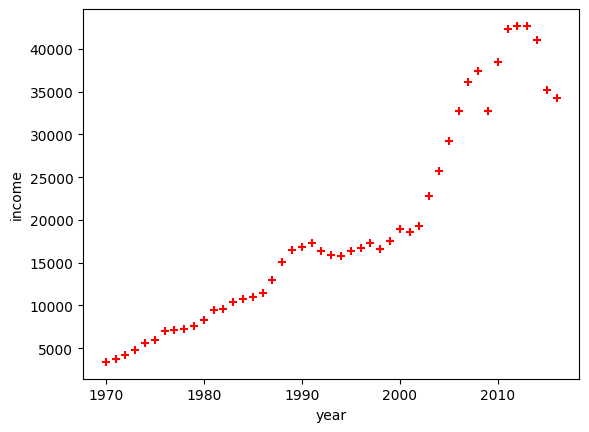

In [15]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df.income
,color='red',marker='+')

In [30]:
new_df = df[['year']]
new_df.head(4)

,year
0,1970
1,1971
2,1972
3,1973


In [20]:
income = df.income
income.head(4)

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
Name: income, dtype: float64

In [31]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,income)

LinearRegression()

### (1) Predict price of a home with year = 2017

In [33]:
reg.predict([[2017]])

C:\Users\goodm\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38803.29886875])

In [25]:
reg.coef_

array([828.46507522])

In [27]:
reg.intercept_

-1632210.7578554575

### Y = m * X + b (m is coefficient and b is intercept)

In [34]:
2017*828.46507522-1632210.7578554575

38803.29886328266

### (2) Predict price of a home with year = 2018

In [35]:
reg.predict([[2018]])

C:\Users\goodm\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39631.76394397])

### Generate CSV file with list of year predictions

In [45]:
year_df = pd.read_csv("year.csv")
year_df.head(3)

,year
0,2017
1,2018
2,2019


In [47]:
p = reg.predict(year_df)
p

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053, 46259.48454575, 47087.94962098, 47916.4146962 ,
       48744.87977142, 49573.34484664, 50401.80992187, 51230.27499709,
       52058.74007231, 52887.20514754, 53715.67022276])

In [48]:
year_df['income']=p
year_df

,year,income
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471
9,2026,46259.484546


In [50]:
year_df.to_csv("prediction.csv")